# Data Visualization Project- Student Performance Analysis

### Description : The dataset "Student Performance in exams"  from kaggle consists of 1000 data points and 8 columns.The first 5 columns of each row gives information about a student in categorical format and the last 3 columns have their scores in math, reading and writing in numerical format.
### Goal : My goal is to analyze how the five categorical attributes in the dataset is influencing the students scores and which one is most influential.
### Task : Analyze the data with some visualizations and gain insights on the statistics.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

### Import the Dataset

In [2]:
df = pd.read_csv(r'StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Existing relevant visualizations for working with that data. 
### Barplots of overall average scores by each  attribute in the dataset

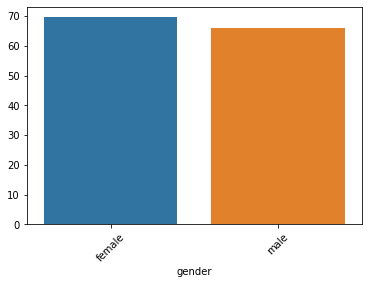

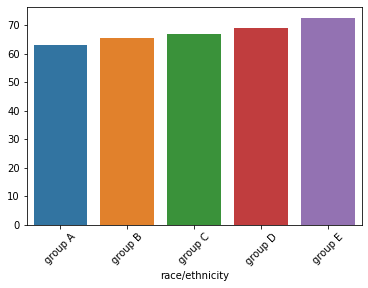

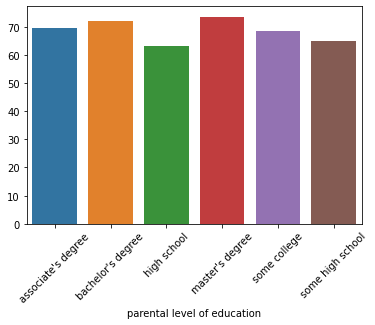

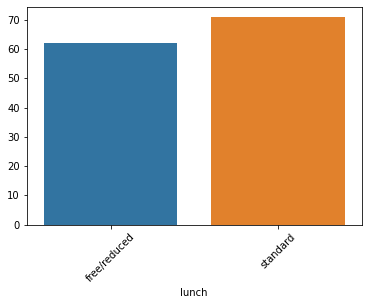

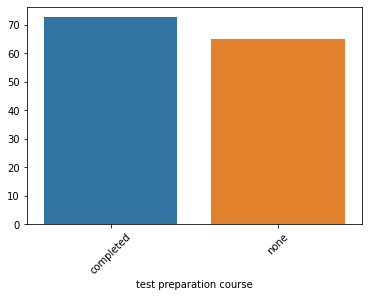

In [3]:
# Attribute labels
label=['gender','race/ethnicity','parental level of education','lunch','test preparation course']

# Calculate Average of 3 subjects
Total = (df['math score']+ df['reading score']+df['writing score'])
df['Average'] = np.round(Total/3 ,2)

# Barplot for each attribute(label)
for c in label:
    data =df.groupby(c)['Average'].mean()
    sns.barplot(x = data.index, y = data.values)
    plt.xticks(rotation = 45)
    plt.show()

### From the above barplots we can visualize that females have higher average scores than males. Students belonging to group E  have high average scores. Students whose parents holds a master's degree have a higher average scores than others. Students who had standard lunch performed better than the students who had free/reduced lunch. Students who completed their course have higher average scores. 
### There is not much difference between each category among the attributes. Also the plots are static and one dimensional from which we cannot infer much details in depth.

## Further Improvement
### There are some rows in the data where a student scored very less in one subject and more in other subjects, hence their average score improved. We have to look into the top scores of the students to conduct our analysis. 
### I want to further analyze the influence of parents education background and test preparation on students performance based on their overall top scores by assigning grades. 
### I added a  pass/fail column to the dataframe(df) based on the condition that a student passed when they scored more than 60 in all 3 subjects individually. Next I visualized what percentage of students passed and failed by each attribute and to see if they have any influence on their performance.

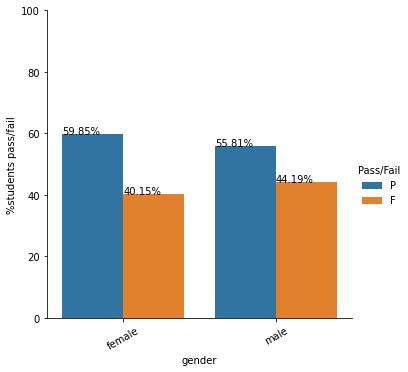

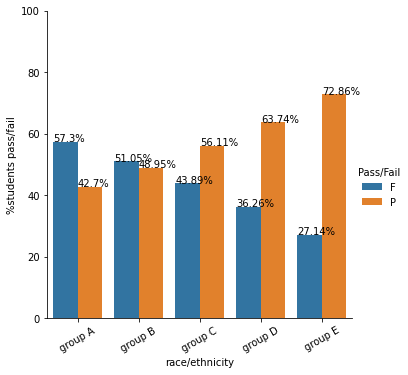

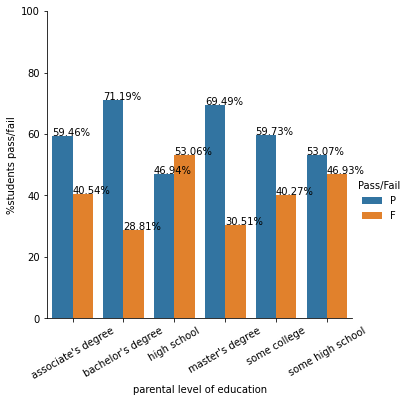

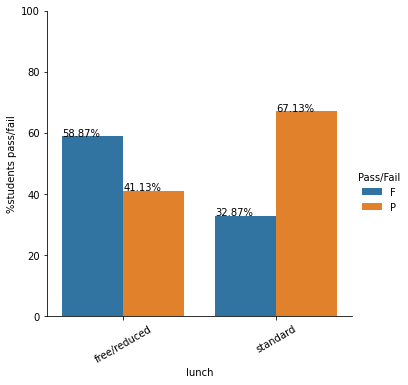

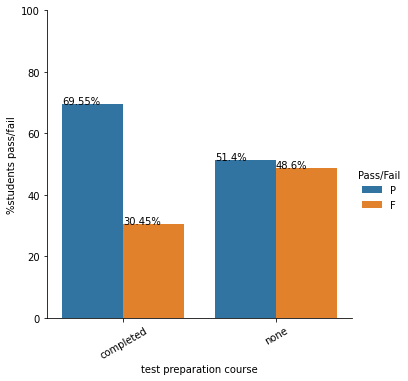

In [4]:
# Overall passs/fail to the df 
df['Pass/Fail'] = np.where(((df['math score'] >60) & (df['reading score'] > 60) &  (df['writing score'] > 60)) ,"P","F" )
for c in label:
    data1 = df.groupby(c)['Pass/Fail'].value_counts(normalize=True) .mul(100).rename('%students pass/fail').reset_index()
    p1= sns.catplot(x=c,y = '%students pass/fail', hue='Pass/Fail',kind='bar', data=data1)
    p1.ax.set_ylim(0,100)
    plt.xticks(rotation = 30)
    for p in p1.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        p1.ax.text(txt_x,txt_y,txt)
plt.show()

In [5]:
len(df[df["Pass/Fail"] =="P"])

579

### From the above plots, since the passing marks are 60 for all 3 subjects, 57.9% of students passed (about 579 out of 1000 students passed). Also, we can notice from the plots that  the pass percentage still exhibiting the same results as the previous plots. 


### Based on the feedback from my friends and family who has computer science background, I have refined my analysis by adding a  Grade column to the data and visualized with Altair interactive plots.  I Implemented interactive visualizations using Altair that allow users to filter, explore, and analyze the data. 

In [6]:
# Grading
def grade(df):
    if df['Pass/Fail'] =='P' :
        if df['Average'] > 90: 
            return 'A'
        if df['Average'] > 80: 
            return 'B'
        if df['Average'] > 70:
            return 'C'
        if df['Average'] > 60:
            return 'D'
    else:
            return 'F'
    
df['Grade']= df.apply(lambda x:grade(x),axis=1)

## Grade plot distribution
### Below is the interactive plot for each grades vs students average scores. Here we can zoom and pan the viewpoint within the data space to access details of interest. I have also changed the size format to display information when data points are overlapping.

In [7]:
alt.Chart(df).mark_circle().encode(
    x = "Grade",
    y = "Average",
    color= alt.Color('test preparation course'), 
    size = 'parental level of education',
    tooltip = ['gender','lunch', 'race/ethnicity'],
).properties(
    width=600,
    height=500
).interactive()

alt.Chart(...)

### Scatter plot of math vs reading vs writing scores with dropdown option for grades.

In [8]:
# Let's implement filtering using dynamic queries. 
dropdown = alt.binding_select (options=df["Grade"].unique(), name="Select a grade:")

# Create a new selection that uses my dynamic query widget
selection = alt.selection(type="single", fields=["Grade"], bind=dropdown)

# Let's specify our chart
x = alt.Chart(df).mark_circle().encode(
    x = "math score",
    y = "reading score" ,
    color=alt.Color('parental level of education'),    
    tooltip = ['writing score','race/ethnicity' , 'test preparation course','lunch', 'gender'],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).interactive()

y = alt.Chart(df).mark_circle().encode(
    x = "reading score",
    y = "writing score" ,
    color=alt.Color('parental level of education'),    
    tooltip = ['math score','race/ethnicity' , 'test preparation course','lunch', 'gender'],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).interactive()
 
    
x | y

alt.HConcatChart(...)

### From the above scatter plot, we can see the distribution of scores. In the 1st plot of math vs reading score, the distribution is scaterred because some students who are good in math did not perform well in reading.
### In the 2nd plot , there seems to be linear correlation between reading and writing scores, since the score are linear and less dispersed. We can further visualize correlation between scores by using heatmap.

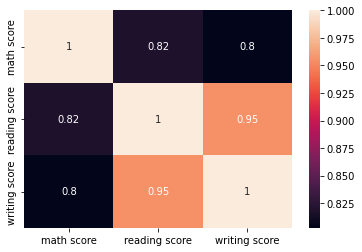

In [9]:
# Correlation PLot
df_scores = df.iloc[:,5:8]
corr_mat = df_scores.corr()
sns.heatmap(corr_mat , annot= True)
plt.show()

### The heatmap shows 95% correlation between reading and writing scores which indicates a strong positive correlation, i.e., if the value of one of the variables increases, the value of the other variable increases as well.

## Summary and Conclusions:
### Interactive plots are more insightful as you can glean more information with limited number of plots. 
### From the above plots, it is evident that parents education background and test preparation have significant influence on  students grades. 
### In general, students with parents of bachelors and masters education performed relatively better than students with parents having only high school education. 
### Students who have completed their test preparations have definitely scored better.We can also notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.
### Majority of the students who got  grade A'  had standard lunch which means healthy food is linked to good grades.
### There is not much clear information about race/ethnicity. There may be non-english speaking students who might have performed well in math but not in reading and writing. Addressing these issues can help students score better in future tests.
### We can repeat our analysis by changing passing score and filter the data by grades to work with the interactive plots. For each grades[A, B, C, D, F], we can look at the distribution of each attribute.
